<a href="https://colab.research.google.com/github/rafaelrlima/cat-and-dog/blob/main/teste_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# teste_zero.ipynb


#### Montando drive com arquivos necessários

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Imports necessários para utilizar o programa

In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import fnmatch
import cv2
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# Se acontecer erro "Failed to get convolution algorithm” coloque o comando abaixo
# https://github.com/tensorflow/tensorflow/issues/43174
# https://stackoverflow.com/questions/53698035/failed-to-get-convolution-algorithm-this-is-probably-because-cudnn-failed-to-in
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from keras import optimizers
import sys; 
from time import time
 


#### Importando o dataset gerado e preparando variáveis

In [ ]:
AX = np.load("/content/drive/MyDrive/Colab Notebooks/x_train.npy")
AY = np.load("/content/drive/MyDrive/Colab Notebooks/x_test.npy")
QX = np.load("/content/drive/MyDrive/Colab Notebooks/y_train.npy")
QY = np.load("/content/drive/MyDrive/Colab Notebooks/y_test.npy")
VX = np.load("/content/drive/MyDrive/Colab Notebooks/v_train.npy")
VY = np.load("/content/drive/MyDrive/Colab Notebooks/v_test.npy")

In [ ]:
nclasses = 2

QY2 = keras.utils.to_categorical(QY, nclasses)
nl, nc = QX.shape[1], QX.shape[2] #28, 28
QX2 = QX.astype('float32') / 255.0 # 0 a 1
QX2 = np.expand_dims(QX2,axis=3)

#### Importando o modelo treinado

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/zero.h5')

#### Avaliando o Modelo

In [ ]:
score = model.evaluate(QX2, QY2, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

Test loss: 0.4793
Test accuracy: 77.00 %
Test error: 23.00 %


Test loss: 0.4349
Test accuracy: 80.90 %
Test error: 19.10 %

Test loss: 0.4473
Test accuracy: 79.50 %
Test error: 20.50 %

Test loss: 0.4706
Test accuracy: 82.10 %
Test error: 17.90 %

Test loss: 0.6623
Test accuracy: 82.40 %
Test error: 17.60 %

Test loss: 0.6032
Test accuracy: 83.00 %
Test error: 17.00 %

#### Predição

In [ ]:
QP = model.predict(QX2)
QP = QP.argmax(axis=-1)

##### Separando as classes

In [ ]:
class_names = ['Cat', 'Dog']

##### Detectando as 10 primeiras predições erradas de cada classe

In [ ]:
error_prediction=[]

#procurando as 10 primeiras classificações de gatos erradas
x = 0
for i in range(500):
  if int(QY[i]) != QP[i]:
    error_prediction.append(i)
    x = x + 1
    if (x==10):
        break
#procurando as 10 primeiras classificações de cachorros erradas
x = 0
for i in range(500,1000):
  if int(QY[i]) != QP[i]:
    error_prediction.append(i)
    x = x + 1
    if (x==10):
        break

#### Imprimindo as 10 primeiras predições erradas de Cats e Dogs

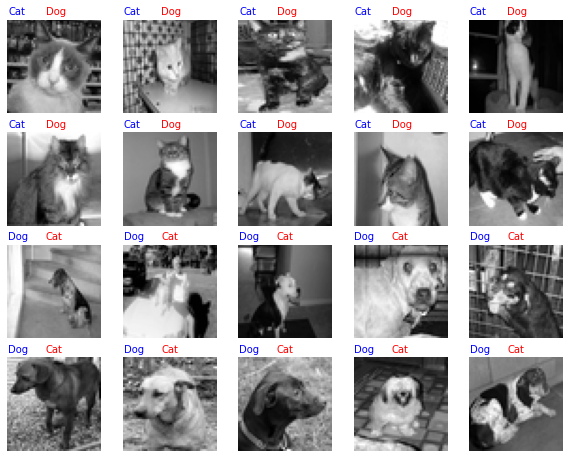

In [ ]:

#plotando as imagens classificadas erradas        
f = plt.figure(figsize=(10,10))
for i in range(20):
  f.add_subplot(5,5,i+1)
  plt.imshow(QX[error_prediction[i]], cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.axis("off");
  plt.text(0,-3,class_names[int(QY[error_prediction[i]])],color="b")
  plt.text(20,-3,class_names[QP[error_prediction[i]]],color="r")
  #plt.savefig("nome_imagem.png")   
plt.show()